# ANN - Brain Tumor MRI Classification

Brain tumors are abnormal growths of cells within the brain, which can be life-threatening and require accurate diagnosis for effective treatment. MRI (Magnetic Resonance Imaging) is a non-invasive imaging technique widely used for the diagnosis and monitoring of brain tumors. In this notebook, we will develop a classification model to identify different types of brain tumors from MRI images using Artificial Neural Networks (ANN).

### Dataset Details
The dataset used in this notebook contains MRI images classified into four categories of brain tumors:

No Tumor - 0, Glioma Tumor - 1, Meningioma Tumor - 2, Pituitary Tumor - 3

Each MRI image is labeled according to these categories, allowing us to train and evaluate our classification models effectively.

### Section 1: Brain Tumor Classification Using TensorFlow
In this section, we will leverage TensorFlow, a powerful and widely-used deep learning library, to create, train, and evaluate a neural network model for classifying brain tumors from MRI images. TensorFlow provides high-level APIs that simplify the process of building and training neural networks, allowing us to focus on the overall architecture and performance of our model.

### Section 2: Brain Tumor Classification by Manually Implementing an ANN
In this section, we will take a deeper dive into the workings of neural networks by manually implementing all the necessary components from scratch. This includes defining the network architecture, initializing weights, implementing forward and backward propagation, and training the network. By doing so, we will gain a deeper understanding of the inner workings of ANNs and the mathematical principles behind them.

#### Let's get started!

## Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
import tensorflow as tf

print(tf.__version__)

2.11.0


## Importing Data

### Training set

In [2]:
# Creating a dataframe with 'Imagepaths' and 'labels'
training_path = "Training/"
training_folders = os.listdir(training_path)

labels = {
    "no_tumor" : 0,
    "glioma_tumor": 1,
    "meningioma_tumor": 2,
    "pituitary_tumor": 3
}

images = []
img_labels = []

for folder in training_folders:
    for img in os.listdir(training_path+folder):
        images.append(training_path+folder+"/"+img)
        img_labels.append(labels[folder])

training_data = pd.DataFrame({"imagepaths": images, "labels": img_labels})

In [3]:
training_data.head(10)

,imagepaths,labels
0,Training/glioma_tumor/gg (1).jpg,1
1,Training/glioma_tumor/gg (10).jpg,1
2,Training/glioma_tumor/gg (100).jpg,1
3,Training/glioma_tumor/gg (101).jpg,1
4,Training/glioma_tumor/gg (102).jpg,1
5,Training/glioma_tumor/gg (103).jpg,1
6,Training/glioma_tumor/gg (104).jpg,1
7,Training/glioma_tumor/gg (105).jpg,1
8,Training/glioma_tumor/gg (106).jpg,1
9,Training/glioma_tumor/gg (107).jpg,1


In [4]:
# Load Images from the paths and add to the dataset
def load_images(img_path):
    image = Image.open(img_path)
    image = image.resize((256,256))
    image = image.convert("L")
    return np.array(image)/255.0

training_data["images"] = training_data["imagepaths"].apply(load_images)

In [5]:
training_data.head(10)

,imagepaths,labels,images
0,Training/glioma_tumor/gg (1).jpg,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,Training/glioma_tumor/gg (10).jpg,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,Training/glioma_tumor/gg (100).jpg,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,Training/glioma_tumor/gg (101).jpg,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,Training/glioma_tumor/gg (102).jpg,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,Training/glioma_tumor/gg (103).jpg,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,Training/glioma_tumor/gg (104).jpg,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
7,Training/glioma_tumor/gg (105).jpg,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,Training/glioma_tumor/gg (106).jpg,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,Training/glioma_tumor/gg (107).jpg,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [6]:
training_data.shape

(2870, 3)

### Testing set

In [7]:
# Creating a dataframe with 'Imagepaths' and 'labels'
testing_path = "Testing/"
testing_folders = os.listdir(testing_path)

images = []
img_labels = []

for folder in testing_folders:
        for img in os.listdir(testing_path+folder):
            images.append(testing_path+folder+"/"+img)
            img_labels.append(labels[folder])

testing_data = pd.DataFrame({"imagepaths": images, "labels": img_labels})

In [8]:
testing_data.head(10)

,imagepaths,labels
0,Testing/glioma_tumor/image(1).jpg,1
1,Testing/glioma_tumor/image(10).jpg,1
2,Testing/glioma_tumor/image(100).jpg,1
3,Testing/glioma_tumor/image(11).jpg,1
4,Testing/glioma_tumor/image(12).jpg,1
5,Testing/glioma_tumor/image(13).jpg,1
6,Testing/glioma_tumor/image(14).jpg,1
7,Testing/glioma_tumor/image(15).jpg,1
8,Testing/glioma_tumor/image(16).jpg,1
9,Testing/glioma_tumor/image(17).jpg,1


In [9]:
# Load Images from the paths and add to the dataset
testing_data["images"] = testing_data["imagepaths"].apply(load_images)

In [10]:
testing_data.head(10)

,imagepaths,labels,images
0,Testing/glioma_tumor/image(1).jpg,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,Testing/glioma_tumor/image(10).jpg,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,Testing/glioma_tumor/image(100).jpg,1,"[[0.027450980392156862, 0.027450980392156862, ..."
3,Testing/glioma_tumor/image(11).jpg,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,Testing/glioma_tumor/image(12).jpg,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,Testing/glioma_tumor/image(13).jpg,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,Testing/glioma_tumor/image(14).jpg,1,"[[0.06274509803921569, 0.011764705882352941, 0..."
7,Testing/glioma_tumor/image(15).jpg,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,Testing/glioma_tumor/image(16).jpg,1,"[[0.8196078431372549, 0.37254901960784315, 0.0..."
9,Testing/glioma_tumor/image(17).jpg,1,"[[0.043137254901960784, 0.043137254901960784, ..."


In [11]:
testing_data.shape

(394, 3)

## Data Preprocessing

In [12]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   imagepaths  2870 non-null   object
 1   labels      2870 non-null   int64 
 2   images      2870 non-null   object
dtypes: int64(1), object(2)
memory usage: 67.4+ KB


In [13]:
training_data["labels"].value_counts().sort_index()

0    395
1    826
2    822
3    827
Name: labels, dtype: int64

### Data Visualization

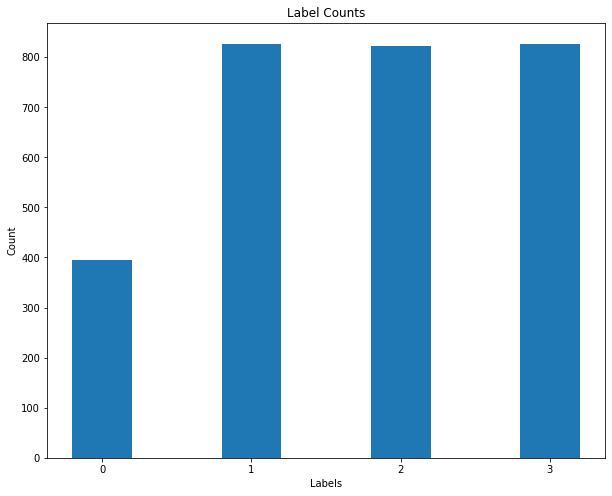

In [14]:
# Barplot to compare the label counts
plt.figure(figsize=(10,8))
labels_count = training_data["labels"].value_counts().sort_index()
plt.bar(labels_count.index.astype(str), labels_count.values, width=0.4)
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Label Counts")
plt.show()

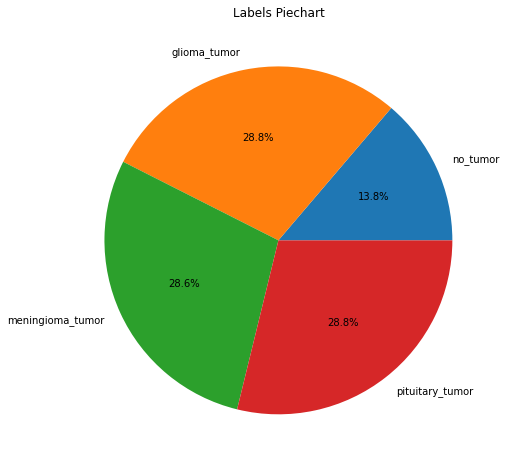

In [15]:
# Piechart to display the label distribution
plt.figure(figsize=(10,8))
plt.pie(labels_count.values, autopct='%1.1f%%', labels=labels.keys())
plt.title("Labels Piechart")
plt.show()

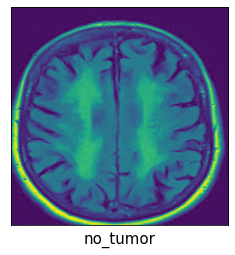

In [16]:
# Shows a random image and it's label from the training set
random_img = random.randint(0, training_data.shape[0]-1)

img_array = training_data["images"][random_img]
plt.xticks([])
plt.yticks([])
plt.imshow(img_array)
plt.grid(False)
plt.xlabel({value:key for key,value in labels.items()}[training_data["labels"][random_img]], fontsize=15)
plt.show()

In [17]:
training_data["images"][random_img], training_data["images"][random_img].shape

(array([[0.03529412, 0.03529412, 0.03529412, ..., 0.03529412, 0.03529412,
         0.03137255],
        [0.03529412, 0.03529412, 0.03529412, ..., 0.03529412, 0.03529412,
         0.03137255],
        [0.03529412, 0.03529412, 0.03529412, ..., 0.03529412, 0.03529412,
         0.03137255],
        ...,
        [0.03921569, 0.03921569, 0.03921569, ..., 0.03137255, 0.03137255,
         0.03137255],
        [0.03921569, 0.03921569, 0.03921569, ..., 0.03137255, 0.03137255,
         0.03137255],
        [0.03921569, 0.03921569, 0.03921569, ..., 0.03137255, 0.03137255,
         0.03137255]]),
 (256, 256))

### Preparing data for training and testing

#### Training set

In [18]:
# Shuffling training dataset
training_data = training_data.sample(frac=1, random_state=7).reset_index(drop=True)
training_data.head()

,imagepaths,labels,images
0,Training/no_tumor/image(98).jpg,0,"[[0.00392156862745098, 0.00392156862745098, 0...."
1,Training/meningioma_tumor/m3 (142).jpg,2,"[[0.011764705882352941, 0.011764705882352941, ..."
2,Training/glioma_tumor/gg (671).jpg,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,Training/no_tumor/image(157).jpg,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,Training/meningioma_tumor/m1(44).jpg,2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [19]:
training_data.shape

(2870, 3)

In [20]:
# Flatten the images
def flatten_img(img):
    return img.reshape(-1,)

training_data["images"] = training_data["images"].apply(flatten_img)

In [21]:
training_data["images"][1], training_data["images"][1].shape

(array([0.01176471, 0.01176471, 0.01176471, ..., 0.01176471, 0.01176471,
        0.01176471]),
 (65536,))

In [22]:
# Spliting training data into train images and train labels
train_images = training_data["images"].values
train_labels = training_data["labels"].values

In [23]:
train_images.shape,train_labels.shape

((2870,), (2870,))

In [24]:
train_images

array([array([0.00392157, 0.00392157, 0.00392157, ..., 0.        , 0.        ,
              0.        ])                                                    ,
       array([0.01176471, 0.01176471, 0.01176471, ..., 0.01176471, 0.01176471,
              0.01176471])                                                    ,
       array([0., 0., 0., ..., 0., 0., 0.]), ...,
       array([0., 0., 0., ..., 0., 0., 0.]),
       array([0.00392157, 0.00392157, 0.00392157, ..., 0.01568627, 0.01176471,
              0.00784314])                                                    ,
       array([0., 0., 0., ..., 0., 0., 0.])], dtype=object)

In [25]:
# Converting 1D array into 2D
train_images = np.vstack(train_images)
train_images

array([[0.00392157, 0.00392157, 0.00392157, ..., 0.        , 0.        ,
        0.        ],
       [0.01176471, 0.01176471, 0.01176471, ..., 0.01176471, 0.01176471,
        0.01176471],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.01568627, 0.01176471,
        0.00784314],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [26]:
train_labels

array([0, 2, 1, ..., 1, 2, 1], dtype=int64)

In [27]:
train_images.shape

(2870, 65536)

#### Testing set

In [28]:
# Flatten test images
testing_data["images"] = testing_data["images"].apply(flatten_img)

testing_data["images"][1],testing_data["images"][1].shape

(array([0., 0., 0., ..., 0., 0., 0.]), (65536,))

In [29]:
# Spliting testing data into test images and test labels
test_images = testing_data["images"].values
test_labels = testing_data["labels"].values

In [30]:
test_images.shape, test_labels.shape

((394,), (394,))

In [31]:
test_images

array([array([0., 0., 0., ..., 0., 0., 0.]),
       array([0., 0., 0., ..., 0., 0., 0.]),
       array([0.02745098, 0.02745098, 0.02745098, ..., 0.01960784, 0.01960784,
              0.01568627])                                                    ,
       array([0., 0., 0., ..., 0., 0., 0.]),
       array([0., 0., 0., ..., 0., 0., 0.]),
       array([0., 0., 0., ..., 0., 0., 0.]),
       array([0.0627451 , 0.01176471, 0.00784314, ..., 0.05490196, 0.05882353,
              0.08235294])                                                    ,
       array([0.        , 0.        , 0.        , ..., 0.        , 0.00392157,
              0.01176471])                                                    ,
       array([0.81960784, 0.37254902, 0.        , ..., 0.        , 0.        ,
              0.        ])                                                    ,
       array([0.04313725, 0.04313725, 0.04313725, ..., 0.03921569, 0.03921569,
              0.03921569])                                  

In [32]:
# Converting 1D array into 2D
test_images = np.vstack(test_images)
test_images

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02745098, 0.02745098, 0.02745098, ..., 0.01960784, 0.01960784,
        0.01568627],
       ...,
       [0.00784314, 0.00784314, 0.00784314, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.0745098 , 0.0745098 , 0.0745098 , ..., 0.01176471, 0.01176471,
        0.01176471],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [33]:
test_images.shape

(394, 65536)

## Section - 1

### Using TensorFlow

#### Model Building

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation="relu", input_shape=(256*256,)),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(4, activation="softmax")
])

In [49]:
model.compile(optimizer="adam",
             loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              67109888  
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 4)                 260       
                                                                 
Total params: 67,807,428
Trainable params: 67,807,428


#### Training the model

In [51]:
# To save the best model for later use
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.h5",
                                               monitor="accuracy",
                                               verbose=1,
                                               save_best_only=True,
                                               mode="max")

In [52]:
model.fit(train_images, train_labels, epochs=10, batch_size=32, callbacks=[checkpoint])

Epoch 1/10
90/90 [==============================] - ETA: 0s - loss: 2.2434 - accuracy: 0.4334
Epoch 1: accuracy improved from -inf to 0.43345, saving model to best_model.h5
90/90 [==============================] - 94s 1s/step - loss: 2.2434 - accuracy: 0.4334
Epoch 2/10
90/90 [==============================] - ETA: 0s - loss: 0.8632 - accuracy: 0.6544
Epoch 2: accuracy improved from 0.43345 to 0.65436, saving model to best_model.h5
90/90 [==============================] - 90s 995ms/step - loss: 0.8632 - accuracy: 0.6544
Epoch 3/10
90/90 [==============================] - ETA: 0s - loss: 0.7507 - accuracy: 0.6819
Epoch 3: accuracy improved from 0.65436 to 0.68188, saving model to best_model.h5
90/90 [==============================] - 86s 946ms/step - loss: 0.7507 - accuracy: 0.6819
Epoch 4/10
90/90 [==============================] - ETA: 0s - loss: 0.5656 - accuracy: 0.7753
Epoch 4: accuracy improved from 0.68188 to 0.77526, saving model to best_model.h5
90/90 [=========================

#### Evaluating

In [53]:
# Loading best model
best_model = tf.keras.models.load_model('best_model.h5')

In [54]:
test_loss, test_acc = best_model.evaluate(test_images, test_labels)

13/13 [==============================] - 2s 126ms/step - loss: 2.2440 - accuracy: 0.7030


In [55]:
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

Test Loss: 2.243959903717041
Test Accuracy: 0.703045666217804


#### Predictions

In [56]:
# Making predictions
test_predictions = best_model.predict(test_images)

13/13 [==============================] - 2s 128ms/step


In [57]:
test_predictions[0]

array([7.0577496e-01, 2.0445570e-05, 2.8991726e-01, 4.2873477e-03],
      dtype=float32)

In [58]:
np.concatenate((test_labels.reshape(-1,1), np.argmax(test_predictions, axis=1).reshape(-1,1)), axis=1)

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 3],
       [1, 3],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 3],
       [1, 0],
       [1, 2],
       [1, 2],
       [1, 0],
       [1, 2],
       [1, 0],
       [1, 2],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 0],
       [1, 0],
       [1, 3],
       [1, 0],
       [1, 2],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 3],
       [1, 3],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 2],
       [1, 0],
       [1, 3],
       [1, 0],
       [1, 3],
       [1, 0],
       [1, 2],
       [1, 1],
       [1, 3],
       [1, 0],
       [1, 0],
       [1, 2],
       [1, 3],
       [1, 2],
       [1, 0],
       [1, 3],
       [1, 0],
       [1, 2],
       [1, 2],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1,

In [59]:
# This function displays the image along with its prediction accuracy
def plot_img(i, prediction_array, true_labels, img):
    true_label, img = true_labels[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    img = img.reshape(256,256)
    plt.imshow(img)
    predicted_label = np.argmax(prediction_array)
    
    if predicted_label==true_label:
        color = "blue"
    else:
        color = "red"
    
    plt.xlabel("{} {:2.0f}% (True = {})".format({value:key for key,value in labels.items()}[predicted_label], 100*np.max(prediction_array), {value:key for key,value in labels.items()}[true_label]),color=color)


# This function plots a bar graph that displays the probability of each label.
def plot_prediction_graph(i, prediction_array, true_labels):
    true_label = true_labels[i]
    plt.grid(False)
    plt.xticks(range(4))
    plt.yticks([])
    
    bar_plot = plt.bar(range(4), prediction_array, color="grey")
    plt.ylim([0,1])
    predicted_label = np.argmax(prediction_array)
    
    bar_plot[predicted_label].set_color("red")
    bar_plot[true_label].set_color("blue")

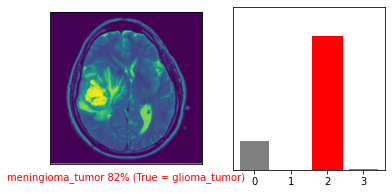

In [60]:
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_img(i, test_predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_prediction_graph(i, test_predictions[i],  test_labels)
plt.show()

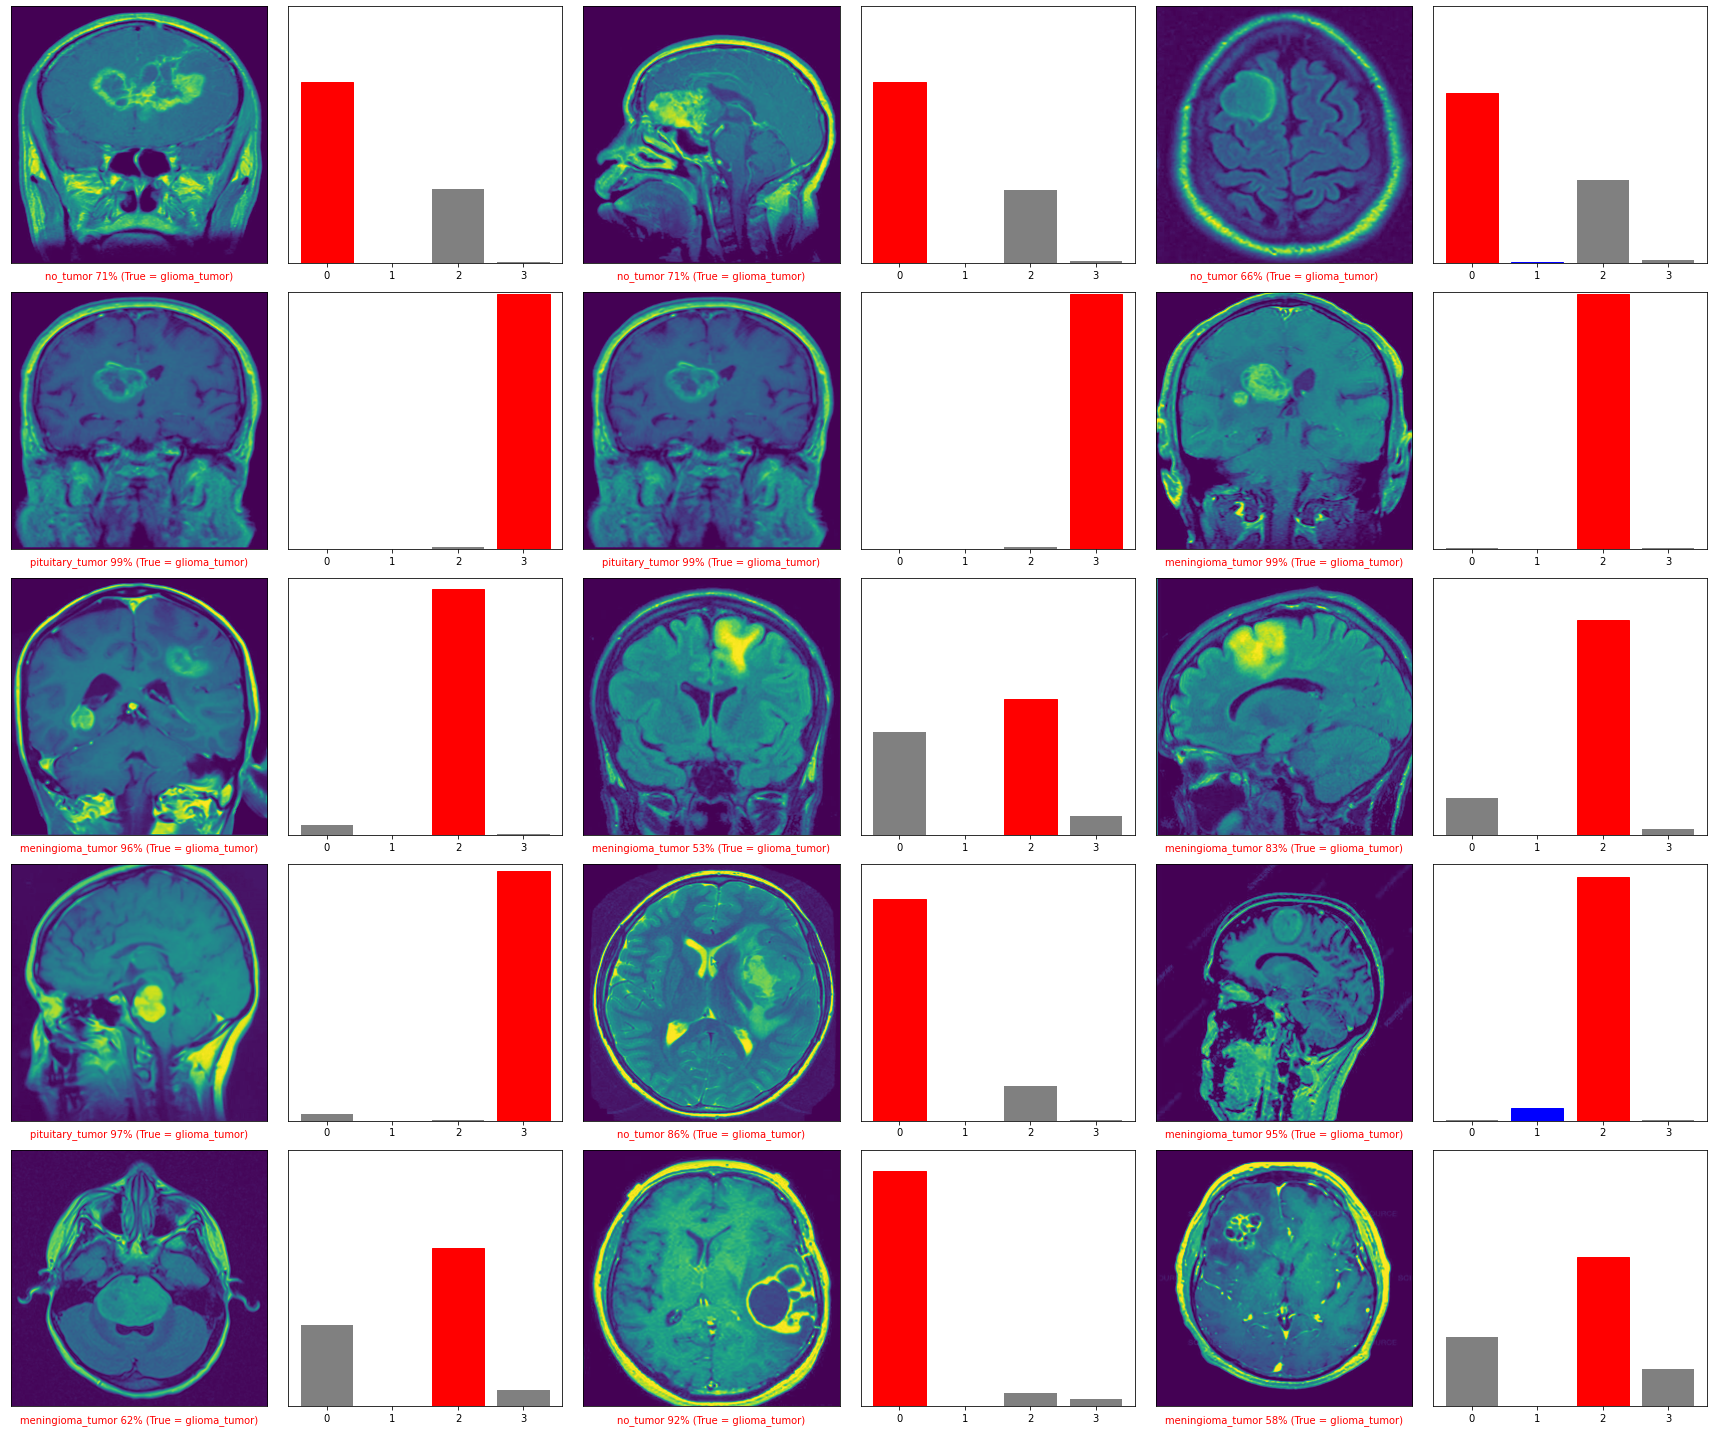

In [61]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*4*num_cols, 4*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_img(i, test_predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_prediction_graph(i, test_predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Section - 2

### From Scratch

#### Initializing Variables

In [40]:
x_train = train_images.T
y_train = np.eye(4)[train_labels]
x_test = test_images.T
y_test = test_labels

layers = [x_train.shape[0], 1024, 512, 256, 128, 64, 4]
m = len(x_train)

In [41]:
# Dimensions of Train set and Test set
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)
print("\nNo. of examples:",m)

x_train: (65536, 2870)
y_train: (2870, 4)
x_test: (65536, 394)
y_test: (394,)

No. of examples: 65536


In [43]:
y_train,train_labels

(array([[1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.]]),
 array([0, 2, 1, ..., 1, 2, 1], dtype=int64))

In [36]:
for i in range(len(layers)):
    print(layers[i], end=" ")
    
    if i != len(layers)-1:
        print("----->", end=" ")

65536 -----> 1024 -----> 512 -----> 256 -----> 128 -----> 64 -----> 4 

In [37]:
W1 = np.random.randn(layers[0], layers[1]) * np.sqrt(2/layers[0])
W2 = np.random.randn(layers[1], layers[2]) * np.sqrt(2/layers[1])
W3 = np.random.randn(layers[2], layers[3]) * np.sqrt(2/layers[2])
W4 = np.random.randn(layers[3], layers[4]) * np.sqrt(2/layers[3])
W5 = np.random.randn(layers[4], layers[5]) * np.sqrt(2/layers[4])
W6 = np.random.randn(layers[5], layers[6]) * np.sqrt(2/layers[5])

b1=np.zeros((1024,1))
b2=np.zeros((512,1))
b3=np.zeros((256,1))
b4=np.zeros((128,1))
b5=np.zeros((64,1))
b6=np.zeros((4,1))

In [45]:
print("W1:",W1.shape)
print("W2:",W2.shape)
print("W3:",W3.shape)
print("W4:",W4.shape)
print("W5:",W5.shape)
print("W6:",W6.shape)

W1: (65536, 1024)
W2: (1024, 512)
W3: (512, 256)
W4: (256, 128)
W5: (128, 64)
W6: (64, 4)


#### Activation Functions

In [39]:
# ReLU
def relu(z):
    return np.maximum(0,z)

# Softmax Function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

# ReLU derivative
def derivative_relu(z):
    return np.where(z > 0, 1,0)

#### Forward Propagation

In [47]:
def forward_prop(X,W1,W2,W3,W4,W5,W6,b1,b2,b3,b4,b5,b6):
    Z1 = W1.T @ X + b1
    A1 = relu(Z1)
    
    Z2 = W2.T @ A1 + b2
    A2 = relu(Z2)
    
    Z3 = W3.T @ A2 + b3
    A3 = relu(Z3)
    
    Z4 = W4.T @ A3 + b4
    A4 = relu(Z4)
    
    Z5 = W5.T @ A4 + b5
    A5 = relu(Z5)
    
    Z6 = W6.T @ A5 + b6
    A6 = softmax(Z6)
    
    return A6